# Beehive Color Palette Explorer

This is the exploratory notebook for the workflow in my Beehive Photos with AI insights and color palette selector for my Blog Series. 

Follow this link to the chat:
*ADD CONVO LINK HERE*. 


**Code Logic:**  
1. Extract dominant colors from an image
2. Convert colors to HEX
3. Append new row to hive_color_log.csv
4. If the file doesn’t exist, create it with headers



In [38]:
from colorthief import ColorThief
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
import tempfile

# Extract EXIF camera data
def extract_exif(image_file):
    img = Image.open(image_file)
    exif_data = {}
    if hasattr(img, '_getexif') and img._getexif() is not None:
        exif = img._getexif()
        for tag, value in exif.items():
            decoded = ExifTags.TAGS.get(tag, tag)
            exif_data[decoded] = value
    return exif_data

# Color Palette
def get_palette(image_file, color_count=5):
    with open(image_file, 'rb') as f:
        color_thief = ColorThief(f)
        palette = color_thief.get_palette(color_count=color_count)
        return palette
    
# Plot dominant colors
def plot_palette(palette):
    plt.figure(figsize=(8, 2))
    for i, color in enumerate(palette):
        plt.fill_between([i, i+1], 0, 1, color=[c/255 for c in color])
    plt.xlim(0, len(palette))
    plt.yticks([])
    plt.title("Dominant Colors from Hive Photo")
    plt.show()

# Conversion function for rgb to hex
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb


def get_file_creation_date(filepath):
    try:
        timestamp = os.path.getctime(filepath)
        return datetime.fromtimestamp(timestamp).strftime("%Y-%m-%d %H:%M:%S")
    except:
        return "Unknown"
    
    

In [16]:
import csv
import os
from datetime import datetime

def save_color_log(image_path, palette, dominant_color, notes=""):
    log_file = "hive_color_log.csv"
    hex_palette = [rgb_to_hex(c) for c in palette]
    hex_dominant = rgb_to_hex(dominant_color)
    today = datetime.now().strftime("%Y-%m-%d")
    image_name = os.path.basename(image_path)
    
    row = [today, image_name, hex_dominant] + hex_palette + [notes]
    headers = ["Date", "Image Name", "Dominant Color"] + [f"Palette {i+1}" for i in range(len(hex_palette))] + ["Notes"]

    file_exists = os.path.isfile(log_file)

    with open(log_file, "a", newline='') as f:
        writer = csv.writer(f)
        if not file_exists:
            writer.writerow(headers)
        writer.writerow(row)

    print(f"Saved color info for {image_name} to {log_file}")


---

In [18]:
# Upload your hive image
FILEPATH = "my_hive_photo.jpg"  # Change this to your actual file path


In [19]:
# Load image and extract palette
color_thief = ColorThief(FILEPATH)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)
hex_palette = [rgb_to_hex(c) for c in palette]


['#877044', '#2b1c0c', '#dbe2a3', '#abaeb5', '#cfb36a', '#48290c']
Dominant Color (RGB): (133, 110, 66)


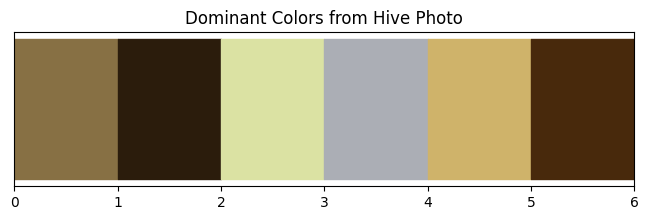

In [20]:
print(hex_palette)
print("Dominant Color (RGB):", dominant_color)
plot_palette(palette)

## Auto-Save: Building a Hive Color Log Over Time

**Purpose:**. 
Automatically save each photo's:
* Filename / date
* Top 5 colors (RGB + HEX)
* Any optional notes into a single .csv file so you can:
* Track seasonal trends
* See how your hive's visual appearance evolves
* Use the data for later visualizations or blog posts

CSV Format Example:
Date	Image Name	Dominant Color	Palette 1	Palette 2	Palette 3	Palette 4	Palette 5	Notes
2023-03-15	hive_0315.jpg	#f1c232	#f1c232	#e69138	#783f04	#fff2cc	#6aa84f	"early spring"
2023-05-22	hive_summer.jpg	#ffd966	#ffd966	#f6b26b	#cc0000	#6aa84f	#38761d	"robbing signs" 


In [21]:
save_color_log(file_path, palette, dominant_color, "2023 may showing puffy eggs maybe drones" )


Saved color info for my_hive_photo.jpg to hive_color_log.csv


## 📸 EXIF Metadata You Can Automatically Extract

These are stored by most cameras and smartphones. Using Pillow or exifread, you can access:

Category	(Example Fields)	--  *Why It’s Interesting*  
**Time**	(e.g. DateTimeOriginal, SubSecTimeOriginal) --	Track daily rhythms or seasonal changes  
**Camera Info** 	(e.g. Model, Make, ExposureTime, FNumber, ISO) --	Helps explain visual differences  
**GPS**	(e.g. GPSLatitude, GPSLongitude) -- 	Link images to field locations (can be mapped)  
**Orientation**	(e.g. Orientation, ImageWidth, ImageHeight) --	Useful for filtering or cropping workflows  


In [30]:
FILEPATH = "default_beepic.jpg"
exif = extract_exif(FILEPATH)
exif

{'Orientation': 1,
 'PhotometricInterpretation': 2,
 'ResolutionUnit': 2,
 'ExifOffset': 102,
 'XResolution': 72.0,
 'YResolution': 72.0,
 'ColorSpace': 1,
 'ExifImageWidth': 1350,
 'ExifImageHeight': 954}

In [39]:
date_taken = exif.get("DateTimeOriginal")
date_source = "EXIF"
if not date_taken:
    date_taken = get_file_creation_date(FILEPATH)
    date_source = "File Creation Date"

camera_model = exif.get("Model", "Unknown")

# Extract color palette and show swatches
palette_rgb = get_palette("default_beepic.jpg", color_count=6)
palette_hex = [rgb_to_hex(c) for c in palette_rgb]

# Get image resolution
img = Image.open(FILEPATH)
image_resolution = f"{img.width} x {img.height}"

In [41]:

print(date_source)
print(date_taken)
print(camera_model)
print(image_resolution)

NameError: name 'disp' is not defined

## ✍️ 2. Manual Metadata You Might Want to Add (User Annotation)

Think of this as building your own beekeeping journal in structured form.

Field 	DTYPE: Type --	Example  
**Season or Bloom Phase**	DTYPE: Dropdown or tags	--	"Goldenrod", "Early Spring", "Fall Dearth"  
**Weather Conditions**	DTYPE: Text or dropdown	--	"Overcast", "Sunny, 85°F", "Storm incoming"  
**Hive Notes**	DTYPE: Text	"Queen was replaced", "Strong foraging"  
**Camera Setup**	DTYPE: Tags or preset	--	"Macro lens", "Trail camera", "iPhone back cam"  
**Hive Behavior**	DTYPE: Tags	--	"Robbing", "Orientation flight", "Guarding"  


In [44]:
import requests
from datetime import datetime

def get_weather_open_meteo(lat, lon, dt):
    """
    Retrieve historical weather data for a specific datetime and location using Open-Meteo API.

    Parameters:
        lat (float): Latitude of the location
        lon (float): Longitude of the location
        dt (datetime): Datetime object for which to retrieve weather info

    Returns:
        dict: Weather data for the hour closest to the given time, including:
              - temperature_C
              - precipitation_mm
              - cloud_cover_percent
              - wind_speed_10m_kph
              - weather_code
              - datetime_used (for reference)
    """
    # Format the date as required by the API
    date_str = dt.strftime("%Y-%m-%d")
    hour = dt.hour

    # Build request parameters
    endpoint = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": date_str,
        "end_date": date_str,
        "hourly": "temperature_2m,precipitation,cloudcover,windspeed_10m,weathercode",
        "timezone": "auto"
    }

    # Send the request
    response = requests.get(endpoint, params=params)
    response.raise_for_status()
    data = response.json()["hourly"]

    # Parse timestamps and find closest hour
    times = [datetime.fromisoformat(t) for t in data["time"]]
    closest_index = min(range(len(times)), key=lambda i: abs(times[i].hour - hour))

    # Extract weather details at closest hour
    weather_info = {
        "datetime_used": str(times[closest_index]),
        "temperature_C": data["temperature_2m"][closest_index],
        "precipitation_mm": data["precipitation"][closest_index],
        "cloud_cover_percent": data["cloudcover"][closest_index],
        "wind_speed_10m_kph": data["windspeed_10m"][closest_index],
        "weather_code": data["weathercode"][closest_index]
    }

    return weather_info


In [46]:
# Example usage
dt = datetime(2023, 7, 10, 14)  # July 10, 2023 at 2:00 PM
lat, lon = 30.2672, -97.7431    # Austin, TX

weather = get_weather_open_meteo(lat, lon, dt)
print(weather)



{'datetime_used': '2023-07-10 14:00:00', 'temperature_C': 35.8, 'precipitation_mm': 0.0, 'cloud_cover_percent': 100, 'wind_speed_10m_kph': 15.6, 'weather_code': 3}


## 🤖 3. Derived Metadata from Processing (Enrichment)

You can extract this programmatically, and it gives you data about the image contents.

Source	(Field)	-- Example  
**Color Extraction**	(dominant_color, palette_hex[]) --	"#f5c542", "#8a6e3f", etc.  
**Vision API**	(labels, objects, confidence[]) --	"bee", "insect", "honeycomb"  
**ML Classifier**	(hive_state, activity_level) --	"calm", "busy", "warning"  
**Image Quality**	(brightness, contrast, entropy) --	Could filter or score photos  
